In [ ]:
import tensorflow as tf
import pandas as pd

In [ ]:
testing_portion = 0.2
oov = '<OOV_TOK>'
vocab_size = 10000
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
max_length = 150

# with stopwords and number

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
data = pd.read_csv('KAI121mentions-merged.csv')
predict_data = pd.read_csv('predict.csv', sep = ';')
data.drop(columns = ['Unnamed: 0'], inplace = True)
predict_data.drop(columns = ['Unnamed: 0'], inplace = True)
print(data)
predict_data

         tanggal sentiment       topic  \
0      9/24/2021    netral  jadwalrute   
1      9/24/2021    netral      syarat   
2      9/24/2021    netral      syarat   
3      9/24/2021    netral      syarat   
4      9/24/2021    netral        lain   
...          ...       ...         ...   
12132   11/29/21    netral        lain   
12133   11/29/21    netral  jadwalrute   
12134   11/29/21    netral        lain   
12135   11/29/21    netral      syarat   
12136   11/29/21    netral      syarat   

                                                    text  
0                             rute kereta yang mana saja  
1      sore min kalo kereta pemberangkatan besok jam ...  
2      halo kalo mau naik kereta tapi belum vaksin di...  
3      mohon info rapid test antigen di stasiun cireb...  
4      railmin boleh tolong dibalas dm saya saya telp...  
...                                                  ...  
12132                                         ke bandung  
12133  halo kak mau nan

,created_at,id,text
0,2022-01-03T23:58:30.000Z,1478153829782802433,tolong cek dm admin terima kasih
1,2022-01-03T23:56:20.000Z,1478153282765869063,nyari duit makanya bagi saya ini sudah termasu...
2,2022-01-03T23:54:59.000Z,1478152944734203905,buset
3,2022-01-03T23:51:11.000Z,1478151987225001985,Happy new year 2022
4,2022-01-03T23:49:39.000Z,1478151604452823040,gak gelem kerjo meneng2an kerjoan e kudu viral
5,2022-01-03T23:47:07.000Z,1478150964364275712,cek dm ya min
6,2022-01-03T23:45:13.000Z,1478150485487984645,lah emangnya dia ngelakuin pelecehan sampe di ...
7,2022-01-03T23:42:54.000Z,1478149904501329920,selamat pagi railmin apakah ada kabar ka bima ...
8,2022-01-03T23:31:34.000Z,1478147050495639555,apalagi kalo udh penuh tetep di paksa masuk ya...
9,2022-01-03T23:18:02.000Z,1478143647090556928,jadwalnya


In [ ]:
print(len(data))
for a in data['sentiment'].unique():
  print("number of " + a + " label: " + str(len(data[data['sentiment'] == a])))
print("\n")
for a in data['topic'].unique():
  print("number of " + a + " label: " + str(len(data[data['topic'] == a])))

12137
number of netral label: 11557
number of positif label: 291
number of negatif label: 289


number of jadwalrute label: 2006
number of syarat label: 3164
number of lain label: 4904
number of aturan label: 530
number of pelayanan label: 184
number of ticketing label: 820
number of experience label: 261
number of fasilitas label: 268


In [ ]:
from sklearn.model_selection import train_test_split

train_text = data['text']
train_sent = data['sentiment']
train_topic = data['topic']

In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token= oov)
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index
print(word_index)

sent_tok = Tokenizer()
sent_tok.fit_on_texts(train_sent)
sent_word_index = sent_tok.word_index
print(sent_word_index)

topic_tok = Tokenizer()
topic_tok.fit_on_texts(train_topic)
topic_word_index = topic_tok.word_index
print(topic_word_index)

{'<OOV_TOK>': 1, 'min': 2, 'di': 3, 'ya': 4, 'kereta': 5, 'stasiun': 6, 'tidak': 7, 'untuk': 8, 'antigen': 9, 'kasih': 10, 'terima': 11, 'ada': 12, 'dari': 13, 'yang': 14, 'jam': 15, 'mau': 16, 'bisa': 17, 'saya': 18, 'dan': 19, 'berapa': 20, 'ke': 21, 'naik': 22, 'ka': 23, 'apa': 24, 'apakah': 25, 'sudah': 26, 'dm': 27, 'ini': 28, 'cek': 29, 'kai': 30, 'kalau': 31, 'tanya': 32, 'lagi': 33, 'kak': 34, 'halo': 35, 'atau': 36, 'sampai': 37, 'kalo': 38, 'vaksin': 39, 'rapid': 40, 'belum': 41, 'selamat': 42, 'harus': 43, 'masih': 44, 'tanggal': 45, 'beroperasi': 46, 'tiket': 47, 'tapi': 48, 'itu': 49, 'juga': 50, 'lokal': 51, 'api': 52, 'aja': 53, 'nya': 54, 'pasar': 55, 'tahun': 56, 'mohon': 57, 'yogyakarta': 58, 'hari': 59, 'tes': 60, 'boleh': 61, 'jadwal': 62, 'kapan': 63, 'surabaya': 64, 'perjalanan': 65, 'pagi': 66, 'tolong': 67, 'udah': 68, 'anak': 69, 'jakarta': 70, 'swab': 71, 'senen': 72, 'makasih': 73, 'dong': 74, 'admin': 75, 'test': 76, 'dengan': 77, 'sama': 78, 'jauh': 79, 'ko

In [ ]:
train_text_seq = tokenizer.texts_to_sequences(train_text)
train_text_pad = pad_sequences(train_text_seq, padding = padding_type, truncating = trunc_type, 
                               maxlen = max_length)

train_sent_seq = np.array(sent_tok.texts_to_sequences(train_sent))
train_sent_pad = pad_sequences(train_sent_seq, maxlen=1)

train_topic_seq = np.array(topic_tok.texts_to_sequences(train_topic))
train_topic_pad = pad_sequences(train_topic_seq, maxlen=1)

print(train_text_pad)
print(train_sent_pad)
print(train_topic_seq)

[[198   5  14 ...   0   0   0]
 [124   2  38 ...   0   0   0]
 [ 35  38  16 ...   0   0   0]
 ...
 [  6  55  72 ...   0   0   0]
 [ 35  16  32 ...   0   0   0]
 [ 42  87   2 ...   0   0   0]]
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
[[3]
 [2]
 [2]
 ...
 [1]
 [2]
 [2]]


Sentiment Classification

In [ ]:
ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
sent_model = tf.keras.Sequential([
                                  tf.keras.layers.Embedding(100000, embedding_dim, 
                                                            input_length = max_length),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(16, activation = 'relu'),
                                  tf.keras.layers.Dense(4, activation = 'softmax')
])

sent_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
sent_hist = sent_model.fit(train_text_pad, train_sent_seq, 
               epochs = 30, callbacks = [cp_callback])

Epoch 1/30
380/380 [==============================] - ETA: 0s - loss: 0.5066 - accuracy: 0.9497
Epoch 1: saving model to sent/cp.ckpt
380/380 [==============================] - 3s 7ms/step - loss: 0.5066 - accuracy: 0.9497
Epoch 2/30
376/380 [============================>.] - ETA: 0s - loss: 0.2200 - accuracy: 0.9522
Epoch 2: saving model to sent/cp.ckpt
380/380 [==============================] - 3s 7ms/step - loss: 0.2200 - accuracy: 0.9522
Epoch 3/30
373/380 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9522
Epoch 3: saving model to sent/cp.ckpt
380/380 [==============================] - 3s 7ms/step - loss: 0.2124 - accuracy: 0.9522
Epoch 4/30
374/380 [============================>.] - ETA: 0s - loss: 0.2071 - accuracy: 0.9522
Epoch 4: saving model to sent/cp.ckpt
380/380 [==============================] - 3s 7ms/step - loss: 0.2069 - accuracy: 0.9522
Epoch 5/30
373/380 [============================>.] - ETA: 0s - loss: 0.2017 - accuracy: 0.9518
Epoch 5: sav

<Figure size 432x288 with 0 Axes>

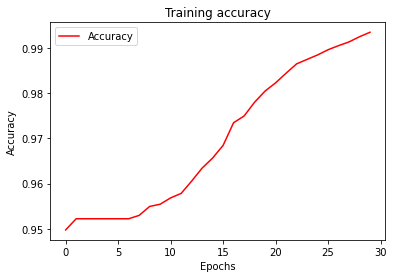

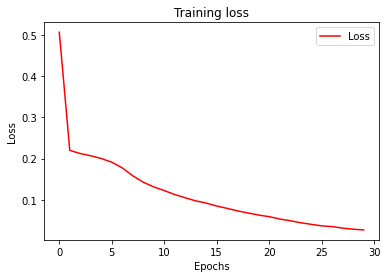

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=sent_hist.history['accuracy']
loss=sent_hist.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')

plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [ ]:
score = sent_model.evaluate(train_text_pad, train_sent_seq, verbose = 0)
print(str(score[1]*100) + "%")

99.39853549003601%


In [ ]:
test_input = input()
text = np.array([test_input])
text = np.array(pad_sequences(tokenizer.texts_to_sequences(text), padding=padding_type,
                                    maxlen=max_length, truncating=trunc_type))
prediction =sent_model.predict(text)
print(prediction)

result = prediction[0].tolist().index(np.max(prediction))
print(result)
cat = ''
for key, value in sent_tok.word_index.items():
  if result == value:
    cat = key
print(cat)

jelek banget pelayanannya
[[3.1894631e-06 4.5527440e-02 5.5162174e-01 4.0284765e-01]]
2
positif


In [ ]:
sent_predict_file = np.array(predict_data['text'])
sent_predict_input = np.array(pad_sequences(tokenizer.texts_to_sequences(sent_predict_file), 
                                                                        maxlen = max_length,
                                                                        padding = padding_type,
                                                                        truncating = trunc_type))
sent_prediction = sent_model.predict(sent_predict_input)
print(sent_prediction)
print(sent_word_index)

slist_result = []
for row in range(len(sent_prediction)):
  sresult = sent_prediction[row].tolist().index(np.max(sent_prediction[row]))
  slist_result.append(sresult)
  print("prdiction- " + str(row) + " : " + str(sresult) + " with " + str(100*max(sent_prediction[row].tolist()*100)) + " percentage")
spre_result=[]
for s in slist_result:
  spre_result.append(sent_tok.index_word[s])

pd.set_option("display.max_columns", 150)
predict_data['predict_sentiment'] = np.array(spre_result)
predict_data[['text', 'predict_sentiment']]

[[8.8102511e-11 9.9999917e-01 6.3469787e-07 1.4430704e-07]
 [1.0006356e-06 9.9586725e-01 2.4237554e-04 3.8893996e-03]
 [9.6966176e-08 9.9676394e-01 1.9007721e-03 1.3351054e-03]
 [6.0805817e-08 9.9837744e-01 9.8647072e-04 6.3599140e-04]
 [1.2848694e-08 9.9985814e-01 7.9146288e-05 6.2724976e-05]
 [1.6992480e-10 9.9999940e-01 3.3960663e-07 2.5734107e-07]
 [4.4446574e-06 7.9255342e-01 6.8438500e-02 1.3900363e-01]
 [7.4679355e-18 1.0000000e+00 1.1546265e-13 5.3636674e-14]
 [1.0223942e-05 4.8834348e-01 1.2852375e-01 3.8312253e-01]
 [4.0029957e-07 9.8209929e-01 9.3433028e-03 8.5570728e-03]
 [2.4428179e-09 9.9997985e-01 1.2370159e-05 7.8061530e-06]
 [2.0878075e-09 9.9998927e-01 6.4460023e-06 4.3268942e-06]
 [6.0805817e-08 9.9837744e-01 9.8647072e-04 6.3599140e-04]
 [1.4463065e-08 9.9968588e-01 2.1122799e-04 1.0296845e-04]]
{'netral': 1, 'positif': 2, 'negatif': 3}
prdiction- 0 : 1 with 99.99991655349731 percentage
prdiction- 1 : 1 with 99.58672523498535 percentage
prdiction- 2 : 1 with 99.6763

,text,predict_sentiment
0,tolong cek dm admin terima kasih,netral
1,nyari duit makanya bagi saya ini sudah termasu...,netral
2,buset,netral
3,Happy new year 2022,netral
4,gak gelem kerjo meneng2an kerjoan e kudu viral,netral
5,cek dm ya min,netral
6,lah emangnya dia ngelakuin pelecehan sampe di ...,netral
7,selamat pagi railmin apakah ada kabar ka bima ...,netral
8,apalagi kalo udh penuh tetep di paksa masuk ya...,netral
9,jadwalnya,netral


Topic

In [ ]:
input_topic = np.concatenate([train_text_pad, train_sent_pad], axis = 1)

ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                               verbose=1)

topic_model = tf.keras.Sequential([
                                  tf.keras.layers.Embedding(10000, embedding_dim, 
                                                            input_length = max_length+1),
                                  tf.keras.layers.Conv1D(32, 5, activation = 'relu'),
                                  tf.keras.layers.MaxPool1D(),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= True)),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                  tf.keras.layers.Dense(16, activation = 'relu'),
                                  tf.keras.layers.Dense(9, activation = 'softmax')
])

topic_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
topic_hist = topic_model.fit(input_topic, train_topic_seq, 
               epochs = 30, callbacks = [cp_callback])

Epoch 1/30
380/380 [==============================] - ETA: 0s - loss: 1.0713 - accuracy: 0.6443
Epoch 1: saving model to sent/cp.ckpt
380/380 [==============================] - 37s 70ms/step - loss: 1.0713 - accuracy: 0.6443
Epoch 2/30
380/380 [==============================] - ETA: 0s - loss: 0.6544 - accuracy: 0.7893
Epoch 2: saving model to sent/cp.ckpt
380/380 [==============================] - 27s 71ms/step - loss: 0.6544 - accuracy: 0.7893
Epoch 3/30
380/380 [==============================] - ETA: 0s - loss: 0.5185 - accuracy: 0.8313
Epoch 3: saving model to sent/cp.ckpt
380/380 [==============================] - 27s 71ms/step - loss: 0.5185 - accuracy: 0.8313
Epoch 4/30
380/380 [==============================] - ETA: 0s - loss: 0.4160 - accuracy: 0.8588
Epoch 4: saving model to sent/cp.ckpt
380/380 [==============================] - 27s 71ms/step - loss: 0.4160 - accuracy: 0.8588
Epoch 5/30
380/380 [==============================] - ETA: 0s - loss: 0.3467 - accuracy: 0.8862
Epoc

<Figure size 432x288 with 0 Axes>

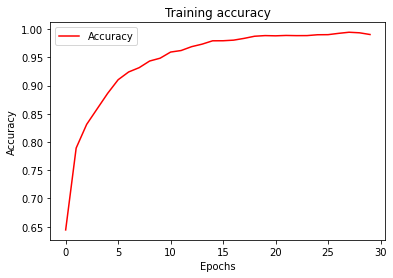

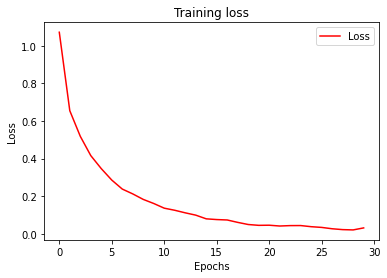

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=topic_hist.history['accuracy']
loss=topic_hist.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')

plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [ ]:
score = topic_model.evaluate(input_topic, train_topic_seq, verbose = 0)
print(str(score[1]*100) + "%")

99.30790066719055%


In [ ]:
text_input = input()
text_input = np.array([text_input])
sent_input = input()
sent_input = np.array([sent_input])
text_input = pad_sequences(tokenizer.texts_to_sequences(text_input), padding=padding_type,
                                    maxlen=max_length, truncating=trunc_type)
sent_input = pad_sequences(sent_tok.texts_to_sequences(sent_input), padding=padding_type,
                                    maxlen=1, truncating=trunc_type)
pre_input = np.array(np.concatenate([text_input, sent_input], axis=1))
prediction =topic_model.predict(pre_input)

result = prediction[0].tolist().index(np.max(prediction))
print(result)
cat = ''
for key, value in topic_tok.word_index.items():
  if result == value:
    cat = key
print(cat)

jelek banget pelayanannya
negatif
8
pelayanan


In [ ]:
sent_model.save('sent_model.h5')
topic_model.save('topic_model.h5')

# with no stopwords and number

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
data = pd.read_csv('/content/KAI121mentions - removed_stpwrds_number.csv')
predict_data = pd.read_csv('predict.csv', sep = ';')
data.drop(columns = ['Unnamed: 0'], inplace = True)
predict_data.drop(columns = ['Unnamed: 0'], inplace = True)
print(data)
predict_data

       Unnamed: 0.1    tanggal sentiment       topic  \
0                 0  9/24/2021    netral  jadwalrute   
1                 1  9/24/2021    netral      syarat   
2                 2  9/24/2021    netral      syarat   
3                 3  9/24/2021    netral      syarat   
4                 4  9/24/2021    netral        lain   
...             ...        ...       ...         ...   
12132         12132   11/29/21    netral        lain   
12133         12133   11/29/21    netral  jadwalrute   
12134         12134   11/29/21    netral        lain   
12135         12135   11/29/21    netral      syarat   
12136         12136   11/29/21    netral      syarat   

                                                    text  
0                                  rute kereta mana saja  
1      sore min kalo kereta pemberangkatan besok jam ...  
2      halo kalo mau naik kereta tapi belum vaksin di...  
3      mohon info rapid test antigen di stasiun cireb...  
4      railmin boleh tolong diba

,created_at,id,text
0,2022-01-03T23:58:30.000Z,1478153829782802433,tolong cek dm admin terima kasih
1,2022-01-03T23:56:20.000Z,1478153282765869063,nyari duit makanya bagi saya ini sudah termasu...
2,2022-01-03T23:54:59.000Z,1478152944734203905,buset
3,2022-01-03T23:51:11.000Z,1478151987225001985,Happy new year 2022
4,2022-01-03T23:49:39.000Z,1478151604452823040,gak gelem kerjo meneng2an kerjoan e kudu viral
5,2022-01-03T23:47:07.000Z,1478150964364275712,cek dm ya min
6,2022-01-03T23:45:13.000Z,1478150485487984645,lah emangnya dia ngelakuin pelecehan sampe di ...
7,2022-01-03T23:42:54.000Z,1478149904501329920,selamat pagi railmin apakah ada kabar ka bima ...
8,2022-01-03T23:31:34.000Z,1478147050495639555,apalagi kalo udh penuh tetep di paksa masuk ya...
9,2022-01-03T23:18:02.000Z,1478143647090556928,jadwalnya


In [ ]:
#data.drop(columns=['Unnamed: 0.1'], inplace = True)
print(len(data))
data

12137


,tanggal,sentiment,topic,text
0,9/24/2021,netral,jadwalrute,rute kereta mana saja
1,9/24/2021,netral,syarat,sore min kalo kereta pemberangkatan besok jam ...
2,9/24/2021,netral,syarat,halo kalo mau naik kereta tapi belum vaksin di...
3,9/24/2021,netral,syarat,mohon info rapid test antigen di stasiun cireb...
4,9/24/2021,netral,lain,railmin boleh tolong dibalas dm saya saya telp...
...,...,...,...,...
12132,11/29/21,netral,lain,bandung
12133,11/29/21,netral,jadwalrute,halo kak mau nanya kereta joglokerto purwokert...
12134,11/29/21,netral,lain,stasiun pasar senen kalo jam siang saya sampai...
12135,11/29/21,netral,syarat,halo mau tanya untuk syarat naik kereta untuk ...


In [ ]:
from sklearn.model_selection import train_test_split

train_text = data['text'].astype(str)
train_sent = data['sentiment']
train_topic = data['topic']

In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token= oov)
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index
print(word_index)

sent_tok = Tokenizer()
sent_tok.fit_on_texts(train_sent)
sent_word_index = sent_tok.word_index
print(sent_word_index)

topic_tok = Tokenizer()
topic_tok.fit_on_texts(train_topic)
topic_word_index = topic_tok.word_index
print(topic_word_index)

{'<OOV_TOK>': 1, 'min': 2, 'di': 3, 'ya': 4, 'kereta': 5, 'stasiun': 6, 'tidak': 7, 'untuk': 8, 'antigen': 9, 'kasih': 10, 'terima': 11, 'ada': 12, 'dari': 13, 'jam': 14, 'mau': 15, 'bisa': 16, 'saya': 17, 'dan': 18, 'berapa': 19, 'naik': 20, 'ka': 21, 'apa': 22, 'sudah': 23, 'dm': 24, 'ini': 25, 'cek': 26, 'kai': 27, 'kalau': 28, 'tanya': 29, 'lagi': 30, 'kak': 31, 'halo': 32, 'atau': 33, 'sampai': 34, 'kalo': 35, 'vaksin': 36, 'rapid': 37, 'belum': 38, 'selamat': 39, 'harus': 40, 'masih': 41, 'tanggal': 42, 'beroperasi': 43, 'tiket': 44, 'tapi': 45, 'itu': 46, 'juga': 47, 'lokal': 48, 'api': 49, 'aja': 50, 'nya': 51, 'pasar': 52, 'mohon': 53, 'yogyakarta': 54, 'tes': 55, 'boleh': 56, 'jadwal': 57, 'kapan': 58, 'surabaya': 59, 'perjalanan': 60, 'pagi': 61, 'tolong': 62, 'udah': 63, 'anak': 64, 'jakarta': 65, 'swab': 66, 'senen': 67, 'makasih': 68, 'admin': 69, 'test': 70, 'dengan': 71, 'sama': 72, 'jauh': 73, 'gambir': 74, 'jalan': 75, 'jarak': 76, 'info': 77, 'semarang': 78, 'malam':

In [ ]:
train_text_seq = tokenizer.texts_to_sequences(train_text)
train_text_pad = pad_sequences(train_text_seq, padding = padding_type, truncating = trunc_type, 
                               maxlen = max_length)

train_sent_seq = np.array(sent_tok.texts_to_sequences(train_sent))
train_sent_pad = pad_sequences(train_sent_seq, maxlen=1)

train_topic_seq = np.array(topic_tok.texts_to_sequences(train_topic))
train_topic_pad = pad_sequences(train_topic_seq, maxlen=1)

print(train_text_pad)
print(train_sent_pad)
print(train_topic_seq)

[[178   5 158 ...   0   0   0]
 [112   2  35 ...   0   0   0]
 [ 32  35  15 ...   0   0   0]
 ...
 [  6  52  67 ...   0   0   0]
 [ 32  15  29 ...   0   0   0]
 [ 39  79   2 ...   0   0   0]]
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
[[3]
 [2]
 [2]
 ...
 [1]
 [2]
 [2]]


Sentiment Classification

In [ ]:
ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
sent_model = tf.keras.Sequential([
                                  tf.keras.layers.Embedding(10000, embedding_dim, 
                                                            input_length = max_length),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(8, activation = 'relu'),
                                  tf.keras.layers.Dense(4, activation = 'softmax')
])

sent_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
sent_hist = sent_model.fit(train_text_pad, train_sent_seq, 
               epochs = 30, callbacks = [cp_callback])

Epoch 1/30
373/380 [============================>.] - ETA: 0s - loss: 0.4740 - accuracy: 0.9524
Epoch 1: saving model to sent/cp.ckpt
380/380 [==============================] - 3s 5ms/step - loss: 0.4707 - accuracy: 0.9522
Epoch 2/30
377/380 [============================>.] - ETA: 0s - loss: 0.2236 - accuracy: 0.9523
Epoch 2: saving model to sent/cp.ckpt
380/380 [==============================] - 2s 5ms/step - loss: 0.2237 - accuracy: 0.9522
Epoch 3/30
372/380 [============================>.] - ETA: 0s - loss: 0.2158 - accuracy: 0.9524
Epoch 3: saving model to sent/cp.ckpt
380/380 [==============================] - 2s 5ms/step - loss: 0.2164 - accuracy: 0.9522
Epoch 4/30
376/380 [============================>.] - ETA: 0s - loss: 0.2108 - accuracy: 0.9522
Epoch 4: saving model to sent/cp.ckpt
380/380 [==============================] - 2s 5ms/step - loss: 0.2109 - accuracy: 0.9522
Epoch 5/30
371/380 [============================>.] - ETA: 0s - loss: 0.2049 - accuracy: 0.9522
Epoch 5: sav

<Figure size 432x288 with 0 Axes>

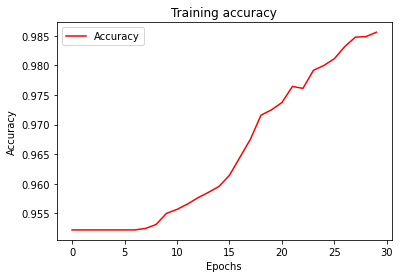

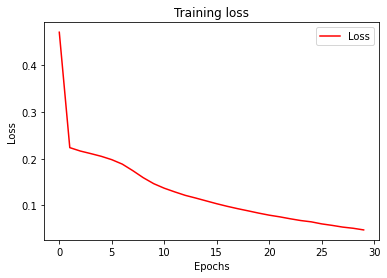

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=sent_hist.history['accuracy']
loss=sent_hist.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')

plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [ ]:
score = sent_model.evaluate(train_text_pad, train_sent_seq, verbose = 0)
print(str(score[1]*100) + "%")

98.93713593482971%


In [ ]:
test_input = 'jelek banget pelayanannya'
text = np.array([test_input])
text = np.array(pad_sequences(tokenizer.texts_to_sequences(text), padding=padding_type,
                                    maxlen=max_length, truncating=trunc_type))
prediction =sent_model.predict(text)

result = prediction[0].tolist().index(np.max(prediction))
print(result)
cat = ''
for key, value in sent_tok.word_index.items():
  if result == value:
    cat = key
print(cat)

3
negatif


In [ ]:
sent_predict_file = np.array(predict_data['text'])
sent_predict_input = np.array(pad_sequences(tokenizer.texts_to_sequences(sent_predict_file), 
                                                                        maxlen = max_length,
                                                                        padding = padding_type,
                                                                        truncating = trunc_type))
sent_prediction = sent_model.predict(sent_predict_input)
print(sent_prediction)
print(sent_word_index)

slist_result = []
for row in range(len(sent_prediction)):
  sresult = sent_prediction[row].tolist().index(np.max(sent_prediction[row]))
  slist_result.append(sresult)
  print("prdiction- " + str(row) + " : " + str(sresult) + " with " + str(100*max(sent_prediction[row].tolist()*100)) + " percentage")
spre_result=[]
for s in slist_result:
  spre_result.append(sent_tok.index_word[s])

pd.set_option("display.max_columns", 150)
predict_data['predict_sentiment'] = np.array(spre_result)
predict_data[['text', 'predict_sentiment']]

[[3.65807864e-08 9.99962211e-01 2.50742396e-05 1.27456124e-05]
 [1.10578894e-05 9.70461071e-01 9.98284295e-03 1.95450112e-02]
 [3.85852809e-06 9.85875189e-01 8.43455084e-03 5.68642560e-03]
 [9.65447180e-06 9.61846232e-01 2.27475874e-02 1.53965326e-02]
 [1.31408297e-06 9.97675121e-01 1.49891584e-03 8.24719784e-04]
 [1.76370580e-08 9.99984980e-01 9.28826921e-06 5.77913715e-06]
 [1.17600603e-05 9.54991400e-01 2.44466290e-02 2.05503087e-02]
 [1.36413916e-12 1.00000000e+00 3.31871775e-09 1.36547151e-09]
 [6.47412962e-05 4.73620027e-01 2.18955532e-01 3.07359725e-01]
 [1.24556427e-05 9.30904150e-01 3.76942940e-02 3.13891210e-02]
 [2.64189708e-07 9.99678254e-01 2.08745405e-04 1.12785099e-04]
 [1.06518605e-07 9.99912858e-01 5.63179274e-05 3.06682705e-05]
 [9.65447180e-06 9.61846232e-01 2.27475874e-02 1.53965326e-02]
 [1.11274767e-06 9.97627318e-01 1.56210095e-03 8.09505407e-04]]
{'netral': 1, 'positif': 2, 'negatif': 3}
prdiction- 0 : 1 with 99.99622106552124 percentage
prdiction- 1 : 1 with 97

,text,predict_sentiment
0,tolong cek dm admin terima kasih,netral
1,nyari duit makanya bagi saya ini sudah termasu...,netral
2,buset,netral
3,Happy new year 2022,netral
4,gak gelem kerjo meneng2an kerjoan e kudu viral,netral
5,cek dm ya min,netral
6,lah emangnya dia ngelakuin pelecehan sampe di ...,netral
7,selamat pagi railmin apakah ada kabar ka bima ...,netral
8,apalagi kalo udh penuh tetep di paksa masuk ya...,netral
9,jadwalnya,netral


In [ ]:
sent_model.save('sent_nosplit_nostpwrds.h5')

Topic

In [ ]:
input_topic = np.concatenate([train_text_pad, train_sent_pad], axis = 1)

ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
topic_model = tf.keras.Sequential([
                                  tf.keras.layers.Embedding(100000, embedding_dim, 
                                                            input_length = max_length+1),
                                  tf.keras.layers.Conv1D(32, 5, activation = 'relu'),
                                  tf.keras.layers.MaxPool1D(),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                                  tf.keras.layers.Dense(16, activation = 'relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(9, activation = 'softmax')
])

topic_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
topic_hist = topic_model.fit(input_topic, train_topic_seq, 
               epochs = 30, callbacks = [cp_callback])

Epoch 1/30
379/380 [============================>.] - ETA: 0s - loss: 1.1555 - accuracy: 0.6256
Epoch 1: saving model to sent/cp.ckpt
380/380 [==============================] - 18s 37ms/step - loss: 1.1551 - accuracy: 0.6257
Epoch 2/30
380/380 [==============================] - ETA: 0s - loss: 0.6683 - accuracy: 0.7828
Epoch 2: saving model to sent/cp.ckpt
380/380 [==============================] - 14s 37ms/step - loss: 0.6683 - accuracy: 0.7828
Epoch 3/30
379/380 [============================>.] - ETA: 0s - loss: 0.5115 - accuracy: 0.8381
Epoch 3: saving model to sent/cp.ckpt
380/380 [==============================] - 14s 37ms/step - loss: 0.5113 - accuracy: 0.8381
Epoch 4/30
379/380 [============================>.] - ETA: 0s - loss: 0.4239 - accuracy: 0.8720
Epoch 4: saving model to sent/cp.ckpt
380/380 [==============================] - 14s 37ms/step - loss: 0.4239 - accuracy: 0.8720
Epoch 5/30
379/380 [============================>.] - ETA: 0s - loss: 0.3465 - accuracy: 0.8917
Epoc

<Figure size 432x288 with 0 Axes>

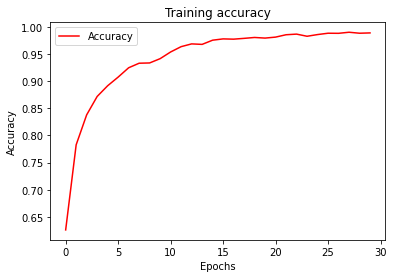

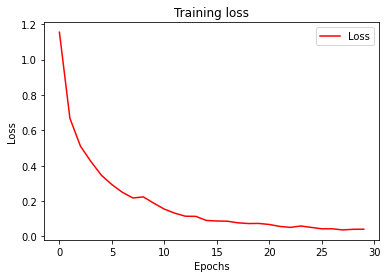

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=topic_hist.history['accuracy']
loss=topic_hist.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')

plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [ ]:
score = topic_model.evaluate(input_topic, train_topic_seq, verbose = 0)
print(str(score[1]*100) + "%")

99.63747262954712%


In [ ]:
text_input = 'jelek banget pelayanannya'
text_input = np.array([text_input])
sent_input = 'negatif'
sent_input = np.array([sent_input])
text_input = pad_sequences(tokenizer.texts_to_sequences(text_input), padding=padding_type,
                                    maxlen=max_length, truncating=trunc_type)
sent_input = pad_sequences(sent_tok.texts_to_sequences(sent_input), padding=padding_type,
                                    maxlen=1, truncating=trunc_type)
pre_input = np.array(np.concatenate([text_input, sent_input], axis=1))
prediction =topic_model.predict(pre_input)

result = prediction[0].tolist().index(np.max(prediction))
print(result)
cat = ''
for key, value in topic_tok.word_index.items():
  if result == value:
    cat = key
print(cat)

8
pelayanan


In [ ]:
topic_model.save('topic_nosplit_nostpwrds.h5')